## Почему плохо сжимается pdf-файл

In [1]:
f = open('pdf.pdf', 'rb').read()
print (len(f))
fr = open('pdf.rar', 'rb').read()
print (len(fr))


1494838
1189258


In [2]:
def p(f):
    """
    Вычисляет вероятности символов [0..255] в файле f
    """
    c = [0]*256
    for b in f:
        c[b] += 1
    return list(map(lambda x: x / len(f), c))

In [3]:
c = p(f)
c[:10]

[0.003584334891138705,
 0.003846570665182448,
 0.003573631390157328,
 0.0036552455851403295,
 0.003675314649480412,
 0.00353750707434518,
 0.003649224865838305,
 0.003971667832902295,
 0.00359370045449741,
 0.0035943694233087466]

In [4]:
cr = p(fr)
cr[:10]

[0.003711557963032412,
 0.003506388016729759,
 0.003597200943781753,
 0.0037166031256464114,
 0.003787235402242407,
 0.0036585837555854154,
 0.0037594870078654086,
 0.003842732190996403,
 0.003693899893883413,
 0.003762850449608075]

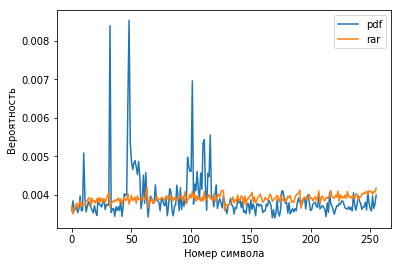

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt 
plt.plot(c)
plt.plot(cr)
plt.xlabel('Номер символа')
plt.ylabel('Вероятность')
plt.legend(['pdf', 'rar'])

plt.show()

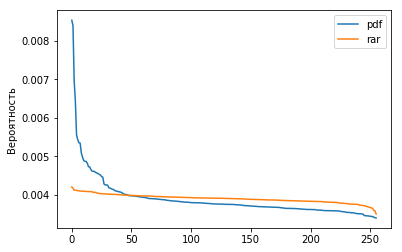

In [7]:
c.sort(key = lambda x: -x)
cr.sort(key = lambda x: -x)
plt.plot(c)
plt.plot(cr)
plt.ylabel('Вероятность')
plt.legend(['pdf', 'rar'])

In [8]:
def entrophy(a):
    from math import log
    return -sum([p*log(p,2) for p in a])

In [9]:
print ("Исходный файл. Энтропия \t= %5.3f" % (entrophy(c)))
print ("Сжатый файл. Энтропия \t\t= %5.3f" % (entrophy(cr)))
print()
print ("Степень сжатия. Исходный файл \t= %5.3f" % (100 * entrophy(c) / 8))
print ("Степень сжатия. Сжатый файл \t= %5.3f" % (100 * entrophy(cr) / 8))

Исходный файл. Энтропия 	= 7.986
Сжатый файл. Энтропия 		= 7.999

Степень сжатия. Исходный файл 	= 99.823
Степень сжатия. Сжатый файл 	= 99.993
